# Sakila DVD Rental – Exploratory Data Analysis (EDA)

- This notebook contains exploratory data analysis and visualizations based on the Sakila DVD rental database.
- It is constructed to answer business questions requested by management using SQL (DuckDB) and Python (Pandas).


In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DuckDB
conn = duckdb.connect("data/sakila.duckdb")

## Task 1a  
### Which movies are longer than 3 hours (180 minutes)?

In [3]:
query = """
SELECT
    title,
    length
FROM staging.film
WHERE length > 180
ORDER BY length DESC
"""
df_long_movies = conn.execute(query).df()
df_long_movies

,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


## Task 1b  
### Which movies have the word "love" in the title?

In [4]:
query = """
SELECT
    title,
    rating,
    length,
    description
FROM staging.film
WHERE REGEXP_MATCHES(LOWER(title), '\\blove\\b')
"""
df_love_movies = conn.execute(query).df()
df_love_movies

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
3,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
4,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...


## Task 1c  
### Descriptive statistics for movie length giving us shortest, longest, mean and median

In [5]:
query = """
SELECT
    MIN(length) AS shortest_movie,
    AVG(length) AS average_movie,
    MEDIAN(length) AS median_movie,
    MAX(length) AS longest_movie
FROM staging.film
"""
df_length_stats = conn.execute(query).df()
df_length_stats

,shortest_movie,average_movie,median_movie,longest_movie
0,46,115.272,114.0,185


## Task 1d  
### Top 10 most expensive movies to rent per day

In [6]:
query = """
SELECT
    title,
    rental_rate,
    rental_duration,
    ROUND(rental_rate / rental_duration, 2) AS price_per_day
FROM staging.film
ORDER BY price_per_day DESC
LIMIT 10
"""
df_expensive_movies = conn.execute(query).df()
df_expensive_movies

,title,rental_rate,rental_duration,price_per_day
0,ACE GOLDFINGER,4.99,3,1.66
1,AMERICAN CIRCUS,4.99,3,1.66
2,AUTUMN CROW,4.99,3,1.66
3,BACKLASH UNDEFEATED,4.99,3,1.66
4,BEAST HUNCHBACK,4.99,3,1.66
5,BEHAVIOR RUNAWAY,4.99,3,1.66
6,BILKO ANONYMOUS,4.99,3,1.66
7,CARIBBEAN LIBERTY,4.99,3,1.66
8,CASPER DRAGONFLY,4.99,3,1.66
9,CASUALTIES ENCINO,4.99,3,1.66


## Task 1e  
### Top 10 actors by number of movies

In [8]:
query = """
SELECT
    a.first_name || ' ' || a.last_name AS actor_name,
    COUNT(*) AS number_of_movies
FROM staging.actor a
JOIN staging.film_actor fa
    ON a.actor_id = fa.actor_id
GROUP BY actor_name
ORDER BY number_of_movies DESC
LIMIT 10
"""
df_top_actors = conn.execute(query).df()
df_top_actors

,actor_name,number_of_movies
0,SUSAN DAVIS,54
1,GINA DEGENERES,42
2,WALTER TORN,41
3,MARY KEITEL,40
4,MATTHEW CARREY,39
5,SANDRA KILMER,37
6,SCARLETT DAMON,36
7,ANGELA WITHERSPOON,35
8,VAL BOLGER,35
9,GROUCHO DUNST,35


## Task 1f – Question 1  
### Which 5 actors has appeared in most Action movies?

In [9]:
query = """
SELECT
    a.first_name || ' ' || a.last_name AS actor_name,
    COUNT(*) AS number_of_action_movies
FROM staging.actor a
JOIN staging.film_actor fa
    ON a.actor_id = fa.actor_id
JOIN staging.film_category fc
    ON fa.film_id = fc.film_id
JOIN staging.category c
    ON fc.category_id = c.category_id
WHERE c.name = 'Action'
GROUP BY actor_name
ORDER BY number_of_action_movies DESC
LIMIT 5
"""
df_action_actor = conn.execute(query).df()
df_action_actor

,actor_name,number_of_action_movies
0,NATALIE HOPKINS,6
1,SEAN GUINESS,5
2,JON CHASE,5
3,SUSAN DAVIS,5
4,KIRSTEN AKROYD,5


## Task 1f – Question 2  
### Which 5 movies are the most recently added to the database?

In [10]:
query = """
SELECT
    title,
    release_year,
    film_id
FROM staging.film
ORDER BY film_id DESC
LIMIT 5
"""
df_latest_movie = conn.execute(query).df()
df_latest_movie

,title,release_year,film_id
0,ZORRO ARK,2006,1000
1,ZOOLANDER FICTION,2006,999
2,ZHIVAGO CORE,2006,998
3,YOUTH KICK,2006,997
4,YOUNG LANGUAGE,2006,996


## Task 1f – Question 3  
### Top 5 actors that appears in most rented movies?

In [11]:
query = """
SELECT
    a.first_name || ' ' || a.last_name AS actor_name,
    COUNT(r.rental_id) AS number_of_rentals
FROM staging.actor a
JOIN staging.film_actor fa
    ON a.actor_id = fa.actor_id
JOIN staging.inventory i
    ON fa.film_id = i.film_id
JOIN staging.rental r
    ON i.inventory_id = r.inventory_id
GROUP BY actor_name
ORDER BY number_of_rentals DESC
LIMIT 5
"""
df_actor_rentals = conn.execute(query).df()
df_actor_rentals

,actor_name,number_of_rentals
0,SUSAN DAVIS,825
1,GINA DEGENERES,753
2,MATTHEW CARREY,678
3,MARY KEITEL,674
4,ANGELA WITHERSPOON,654


## Task 1f – Question 4  
### Which store has generated the highest total revenue?

In [13]:
query = """
SELECT
    i.store_id,
    SUM(p.amount) AS total_revenue
FROM staging.inventory i
JOIN staging.rental r
    ON i.inventory_id = r.inventory_id
JOIN staging.payment p
    ON r.rental_id = p.rental_id
GROUP BY i.store_id
ORDER BY total_revenue DESC
"""
df_store_revenue = conn.execute(query).df()
df_store_revenue

,store_id,total_revenue
0,2,33726.77
1,1,33679.79


## Task 1f – Question 5  
### Which 5 movies have been rented the least?

In [14]:
query = """
SELECT
    f.title,
    COUNT(r.rental_id) AS number_of_rentals
FROM staging.film f
LEFT JOIN staging.inventory i
    ON f.film_id = i.film_id
LEFT JOIN staging.rental r
    ON i.inventory_id = r.inventory_id
GROUP BY f.title
ORDER BY number_of_rentals ASC
LIMIT 5
"""
df_least_rented = conn.execute(query).df()
df_least_rented

,title,number_of_rentals
0,ARK RIDGEMONT,0
1,CROWDS TELEMARK,0
2,SISTER FREDDY,0
3,KENTUCKIAN GIANT,0
4,CROSSING DIVORCE,0


## Task 2a  
### Top 5 customers by total spend - graph

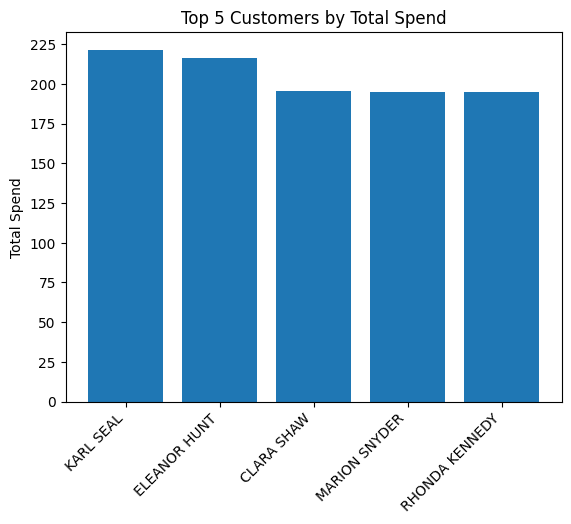

In [16]:
import matplotlib.ticker as ticker

query = """
SELECT
    c.first_name || ' ' || c.last_name AS customer_name,
    SUM(p.amount) AS total_spend
FROM staging.customer c
JOIN staging.payment p
    ON c.customer_id = p.customer_id
GROUP BY customer_name
ORDER BY total_spend DESC
LIMIT 5
"""
df_top_customers = conn.execute(query).df()

plt.figure()
plt.bar(df_top_customers["customer_name"], df_top_customers["total_spend"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Spend")
plt.title("Top 5 Customers by Total Spend")

# Set y-axis ticks to steps of 25
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(25))

plt.show()

## Task 2b  
### Revenue per film category - graph


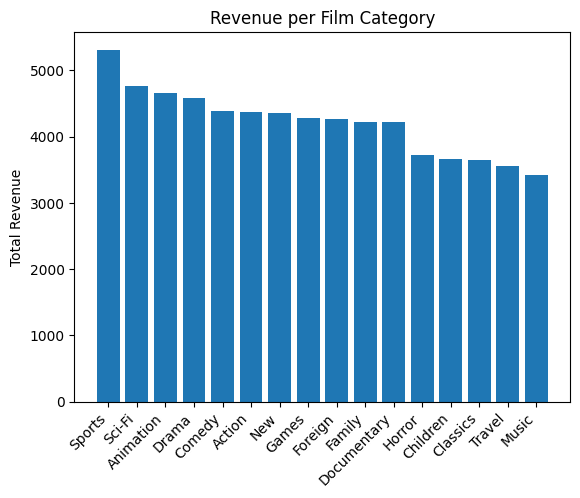

In [17]:
query = """
SELECT
    c.name AS category,
    SUM(p.amount) AS total_revenue
FROM staging.category c
JOIN staging.film_category fc
    ON c.category_id = fc.category_id
JOIN staging.inventory i
    ON fc.film_id = i.film_id
JOIN staging.rental r
    ON i.inventory_id = r.inventory_id
JOIN staging.payment p
    ON r.rental_id = p.rental_id
GROUP BY category
ORDER BY total_revenue DESC
"""
df_revenue_category = conn.execute(query).df()

plt.figure()
plt.bar(df_revenue_category["category"], df_revenue_category["total_revenue"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Revenue")
plt.title("Revenue per Film Category")
plt.show()